## Experiment with BatchNormalization and Dropout

**Datasets and Pre Processing**

In [0]:
import keras
from keras.datasets import mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


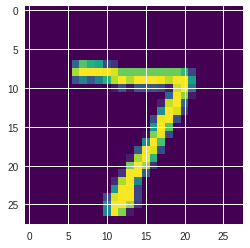

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='viridis')

In [0]:
print(xtest[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
#print(xtest[0])

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
import keras
from keras import models
from keras import layers

**Mounting In Colab**

In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


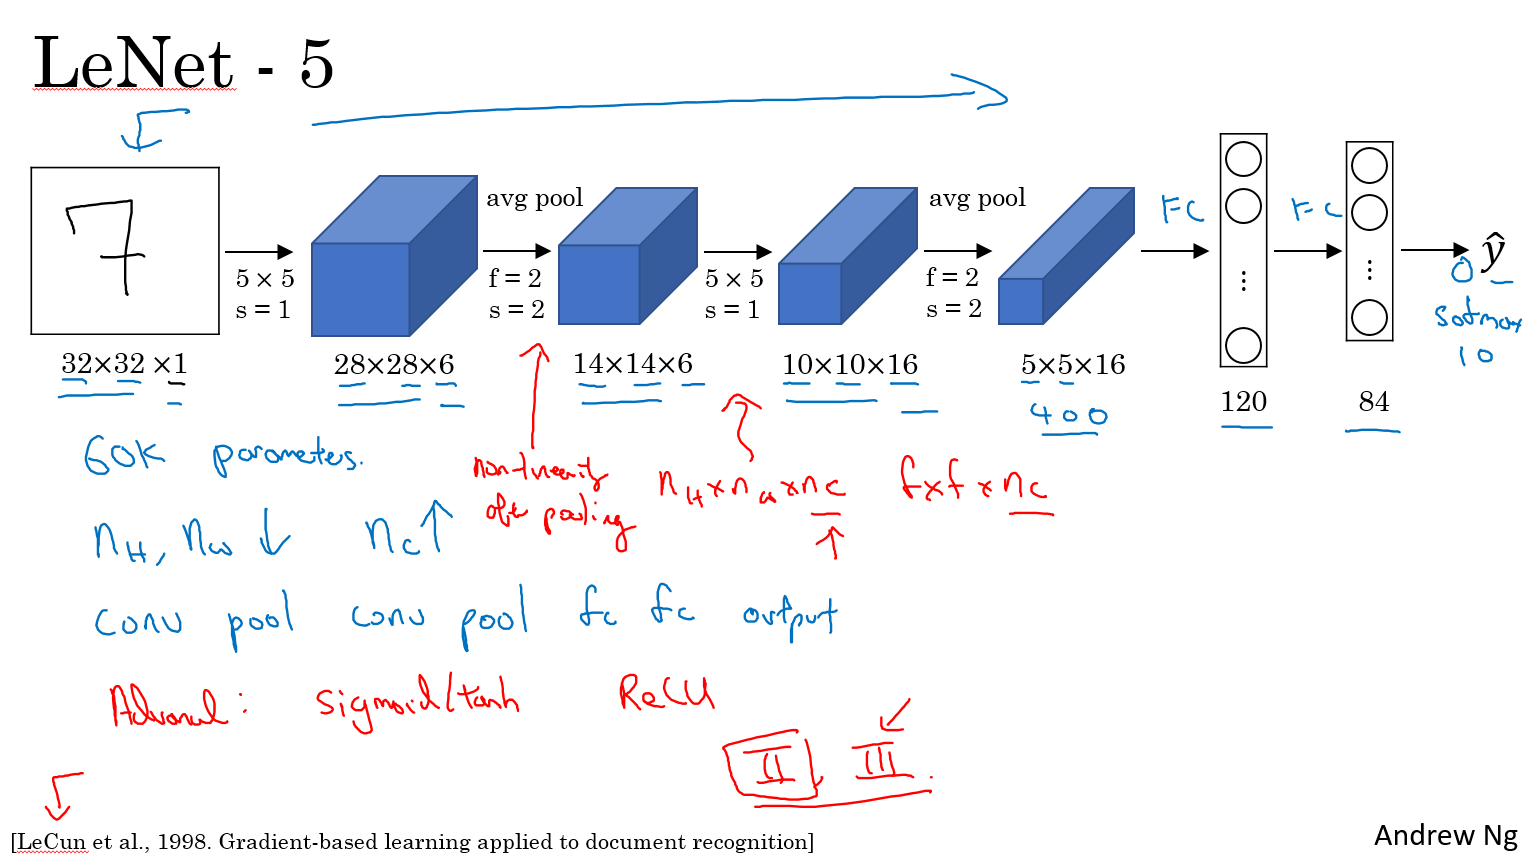

In [0]:
from IPython.display import Image, display
display(Image(filename="/content/cnn/My Drive/CNN_Tutorial/Test_Images/a.png"))

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(84, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 6)         24        
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 16)          64        
__________

**Saving Model as Image**

In [0]:
#from keras.utils import plot_model
#plot_model(model, to_file="a.png")

**Compile the model**

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

**Keras Callbacks**
* ModelCheckPoint
* TensorBoard
* CSVLogger
* ReduceOnPlateu

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

**Fit the model**

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=25, verbose=2,callbacks=[cv,mc,tb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 4s - loss: 0.5149 - acc: 0.8396 - val_loss: 0.1191 - val_acc: 0.9644
Epoch 2/25
 - 4s - loss: 0.1779 - acc: 0.9451 - val_loss: 0.0790 - val_acc: 0.9754
Epoch 3/25
 - 4s - loss: 0.1293 - acc: 0.9599 - val_loss: 0.0595 - val_acc: 0.9822
Epoch 4/25
 - 4s - loss: 0.1107 - acc: 0.9655 - val_loss: 0.0723 - val_acc: 0.9783
Epoch 5/25
 - 4s - loss: 0.0956 - acc: 0.9705 - val_loss: 0.0468 - val_acc: 0.9860
Epoch 6/25
 - 4s - loss: 0.0856 - acc: 0.9738 - val_loss: 0.0436 - val_acc: 0.9868
Epoch 7/25
 - 4s - loss: 0.0771 - acc: 0.9759 - val_loss: 0.0476 - val_acc: 0.9845
Epoch 8/25
 - 4s - loss: 0.0704 - acc: 0.9784 - val_loss: 0.0399 - val_acc: 0.9881
Epoch 9/25
 - 4s - loss: 0.0678 - acc: 0.9787 - val_loss: 0.0397 - val_acc: 0.9878
Epoch 10/25
 - 4s - loss: 0.0617 - acc: 0.9802 - val_loss: 0.0360 - val_acc: 0.9903
Epoch 11/25
 - 4s - loss: 0.0601 - acc: 0.9810 - val_loss: 0.0376 - val_acc: 0.9892
Epoch 12/25
 - 4s - loss: 0.0560 - 

**Evaluate**

In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 90us/step
0.021903452907229077
0.9933


**Loss and Acc Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(25)

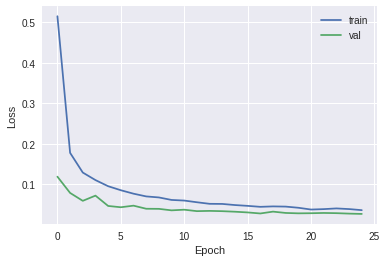

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

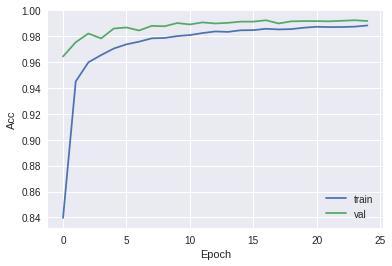

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Prediction**

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[2.02e-08 1.14e-06 4.35e-07 1.07e-06 4.52e-09 5.47e-08 3.73e-10 1.00e+00
  4.65e-09 5.70e-07]]
7


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
14 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
15 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
17 Actual is  [0. 0. 0. 0. 0. 0. 

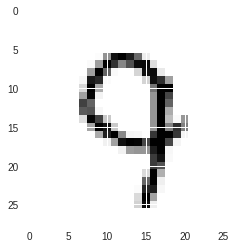

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

**Confusion Matrix**

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       980
     class 1       0.99      1.00      1.00      1135
     class 2       1.00      0.99      0.99      1032
     class 3       0.99      1.00      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.99      0.99      0.99       892
     class 6       1.00      0.99      0.99       958
     class 7       0.99      0.99      0.99      1028
     class 8       1.00      0.99      0.99       974
     class 9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    1 1025    0    1    0    0    4    0    0]
 [   0    0    0 1005    0    1    0    2    1    1]
 [   0    0    0    0  974    0    3    0    1    4]
 [   1    0    0    7    0  882    1    1    0    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    2    3    1    0    0    0 1021    0    1]
 [   2    1    1    1    0    1    0    2  964    2]
 [   0    0    0    2    4    3    0    1    0  999]]


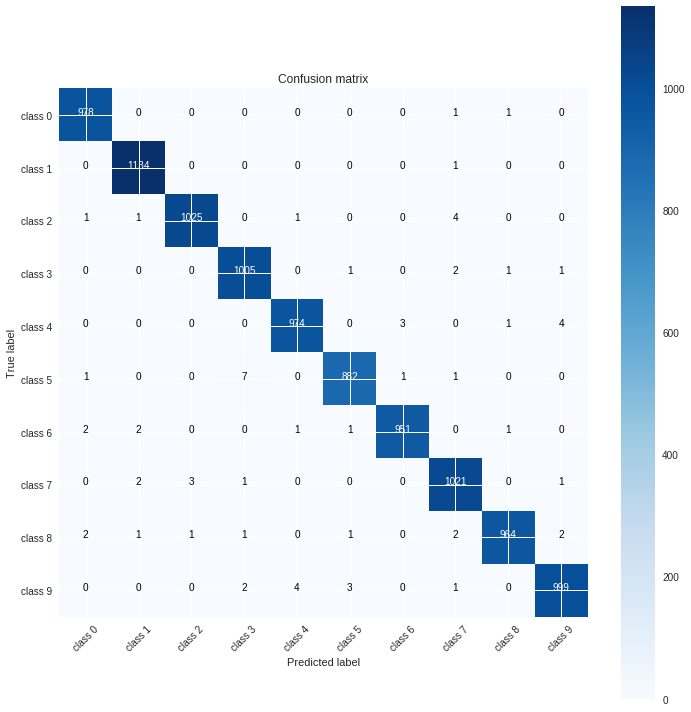

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()